<a href="https://colab.research.google.com/github/MGomezN/cicese_ert_escuela_verano_2022/blob/main/Preparando_datos_ERT_escuela_verano_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import copy
import numpy as np

## Leyendo archivo de salida del Super Sting

In [ ]:
name=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LAEW1DD.stg'

In [ ]:
# Estos nombres van de acuerdo a lo que especifique el fabricante
columns = [
        'data_number', #data record number
        'USER', 
        'date',
        'time',
        'V/I',
        '% error in tenths of percent',
        'I_mA', #Output current in mA
        'apres',
        'command file identifier', 
        'XA',
        'Y-coordinate for the A-electrode',
        'Z-coordinate for the A-electrode',
        'XB',
        'Y-coordinate for the B-electrode',
        'Z-coordinate for the B-electrode',
        'XM',
        'Y-coordinate for the M-electrode',
        'Z-coordinate for the M-electrode',
        'XN',
        'Y-coordinate for the N-electrode',
        'Z-coordinate for the N-electrode'
    ]

stg_crudo = pd.read_csv(name, skiprows=3, header=None, names=columns)

In [ ]:
stg_crudo.head()

,data_number,USER,date,time,V/I,% error in tenths of percent,I_mA,apres,command file identifier,XA,...,Z-coordinate for the A-electrode,XB,Y-coordinate for the B-electrode,Z-coordinate for the B-electrode,XM,Y-coordinate for the M-electrode,Z-coordinate for the M-electrode,XN,Y-coordinate for the N-electrode,Z-coordinate for the N-electrode
0,1,USER,20220819,12:42:59,-0.885954,3,256,-166.9980,LAEW1DD,10.0,...,0.0,0.0,0.0,0.0,20.0,0.0,0.0,30.0,0.0,0.0
1,2,USER,20220819,12:43:14,0.264351,0,92,199.3160,LAEW1DD,10.0,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,40.0,0.0,0.0
2,3,USER,20220819,12:43:28,0.058611,1,92,110.4790,LAEW1DD,10.0,...,0.0,0.0,0.0,0.0,40.0,0.0,0.0,50.0,0.0,0.0
3,4,USER,20220819,12:43:42,0.028455,1,91,107.2720,LAEW1DD,10.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,60.0,0.0,0.0
4,5,USER,20220819,12:43:57,0.014640,7,91,96.5834,LAEW1DD,10.0,...,0.0,0.0,0.0,0.0,60.0,0.0,0.0,70.0,0.0,0.0


In [ ]:
print('El valor máximo en x de los electrodos es', stg_crudo.XN.max())
stg_crudo.describe()


El valor máximo en x de los electrodos es 270.0


,data_number,date,V/I,% error in tenths of percent,I_mA,apres,XA,Y-coordinate for the A-electrode,Z-coordinate for the A-electrode,XB,Y-coordinate for the B-electrode,Z-coordinate for the B-electrode,XM,Y-coordinate for the M-electrode,Z-coordinate for the M-electrode,XN,Y-coordinate for the N-electrode,Z-coordinate for the N-electrode
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.0,237.000000,237.0,237.0,237.000000,237.0,237.0,237.000000,237.0,237.0
mean,119.000000,20220819.0,0.303185,4.983122,208.012658,1072.668734,103.248945,0.0,0.0,90.295359,0.0,0.0,166.751055,0.0,0.0,179.704641,0.0,0.0
std,68.560193,0.0,6.487610,6.126468,173.258073,97427.519310,60.938922,0.0,0.0,62.588220,0.0,0.0,60.938922,0.0,0.0,62.588220,0.0,0.0
min,1.000000,20220819.0,-60.765000,0.000000,20.000000,-801775.000000,10.000000,0.0,0.0,0.000000,0.0,0.0,20.000000,0.0,0.0,30.000000,0.0,0.0
25%,60.000000,20220819.0,0.004006,1.000000,63.000000,59.643200,50.000000,0.0,0.0,40.000000,0.0,0.0,120.000000,0.0,0.0,130.000000,0.0,0.0
50%,119.000000,20220819.0,0.011336,3.000000,175.000000,93.745400,100.000000,0.0,0.0,80.000000,0.0,0.0,170.000000,0.0,0.0,190.000000,0.0,0.0
75%,178.000000,20220819.0,0.087616,7.000000,255.000000,157.865000,150.000000,0.0,0.0,140.000000,0.0,0.0,220.000000,0.0,0.0,230.000000,0.0,0.0
max,237.000000,20220819.0,37.369200,44.000000,949.000000,660265.000000,250.000000,0.0,0.0,240.000000,0.0,0.0,260.000000,0.0,0.0,270.000000,0.0,0.0


### Eliminando columnas que no se ocupan

In [ ]:
stg_columnas_relevantes=stg_crudo.drop(['USER','command file identifier',
        '% error in tenths of percent',                                  
        'Y-coordinate for the A-electrode',
        'Z-coordinate for the A-electrode',  
        'Y-coordinate for the B-electrode',
        'Z-coordinate for the B-electrode',
        'Y-coordinate for the M-electrode',
        'Z-coordinate for the M-electrode',
        'Y-coordinate for the N-electrode',
        'Z-coordinate for the N-electrode'],axis=1)

In [ ]:
stg_columnas_relevantes.head()

,data_number,date,time,V/I,I_mA,apres,XA,XB,XM,XN
0,1,20220819,12:42:59,-0.885954,256,-166.9980,10.0,0.0,20.0,30.0
1,2,20220819,12:43:14,0.264351,92,199.3160,10.0,0.0,30.0,40.0
2,3,20220819,12:43:28,0.058611,92,110.4790,10.0,0.0,40.0,50.0
3,4,20220819,12:43:42,0.028455,91,107.2720,10.0,0.0,50.0,60.0
4,5,20220819,12:43:57,0.014640,91,96.5834,10.0,0.0,60.0,70.0


In [ ]:
# Filtrando datos basados en V/I

In [ ]:
stg_columnas_relevantes_filtroVI = copy.deepcopy(stg_columnas_relevantes)
stg_columnas_relevantes_filtroVI = stg_columnas_relevantes_filtroVI[(np.abs(stg_columnas_relevantes_filtroVI['V/I']) > 0.001)] 
stg_columnas_relevantes_filtroVI = stg_columnas_relevantes_filtroVI[(np.abs(stg_columnas_relevantes_filtroVI['I_mA']) > 10)] 

# Filtrando resistividad aparente

### ¿Cómo se distribuyen los valores de resistividad medidos?

In [ ]:
stg_columnas_relevantes_filtroVI.apres.describe()

count       233.000000
mean       1090.891815
std       98263.721784
min     -801775.000000
25%          60.863100
50%          94.269500
75%         158.431000
max      660265.000000
Name: apres, dtype: float64

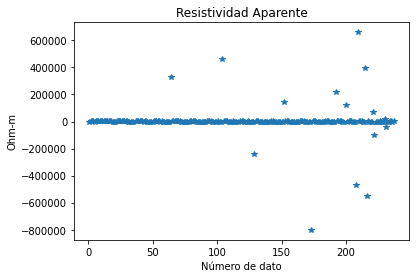

In [ ]:
plt.plot(stg_columnas_relevantes_filtroVI.data_number,stg_columnas_relevantes_filtroVI.apres,'*')
plt.title('Resistividad Aparente')
plt.xlabel('Número de dato')
plt.ylabel('Ohm-m')
plt.show()

### Valores máximos y mínimos de resistividad

In [ ]:
apresmin = 1
apresmax = 10000
stg_columnas_relevantes_filtrores = copy.deepcopy(stg_columnas_relevantes_filtroVI)
stg_columnas_relevantes_filtrores = stg_columnas_relevantes_filtrores[(stg_columnas_relevantes_filtrores['apres'] > apresmin)] 
stg_columnas_relevantes_filtrores = stg_columnas_relevantes_filtrores[(stg_columnas_relevantes_filtrores['apres'] < apresmax)] 
# stg_columnas_relevantes_filtrores = stg_columnas_relevantes_filtrores.reset_index(drop=True) # Esto porque al eliminar renglones que no satisfacen la condicion, algunos renglones desaparecen y la iteración más adelante se vuelve loca porque no puede acceder a ciertos elementos.

In [ ]:
print((len(stg_columnas_relevantes_filtrores)/len(stg_crudo))*100)
stg_columnas_relevantes_filtrores.apres.describe()

89.87341772151899


count     213.000000
mean      191.425277
std       452.380481
min        11.359600
25%        63.529500
50%        94.376900
75%       155.493000
max      6086.870000
Name: apres, dtype: float64

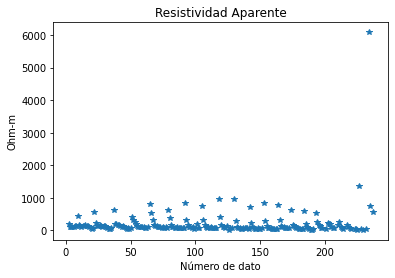

In [ ]:
plt.plot(stg_columnas_relevantes_filtrores.data_number, stg_columnas_relevantes_filtrores.apres,'*')
plt.title('Resistividad Aparente')
plt.xlabel('Número de dato')
plt.ylabel('Ohm-m')
plt.show()

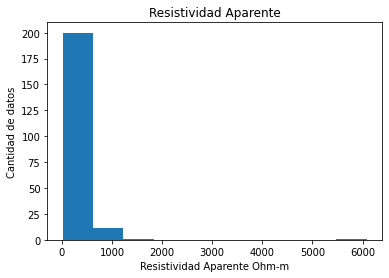

In [ ]:
plt.hist(stg_columnas_relevantes_filtrores.apres)
plt.title('Resistividad Aparente')
plt.xlabel('Resistividad Aparente Ohm-m')
plt.ylabel('Cantidad de datos')
plt.show()

# Escribiendo archivo para geoinversion.cicese.mx

### Calculando xp, n, a

In [ ]:
stg_geoinversion_cicese = copy.deepcopy(stg_columnas_relevantes_filtrores)

De acuerdo a la descripción sólo se necesitan los siguientes datos:


*   Term 1 is the center of the four electrodes array in x direction and meters. (**xp**)
*   Term 2, is “**n**”
* Term 3 “**a**” is the distance between source and receiver between dipoles in meters and it can be an entire or decimal number. 
* Term 4 is the **apparent resistivity** in ohm-m.



In [ ]:
stg_geoinversion_cicese['xp']=(stg_columnas_relevantes_filtrores.XA + stg_columnas_relevantes_filtrores.XB + stg_columnas_relevantes_filtrores.XM + stg_columnas_relevantes_filtrores.XN)/4
stg_geoinversion_cicese['n']= (stg_columnas_relevantes_filtrores.XM - stg_columnas_relevantes_filtrores.XA )/ (stg_columnas_relevantes_filtrores.XA - stg_columnas_relevantes_filtrores. XB)
stg_geoinversion_cicese['a']= (stg_columnas_relevantes_filtrores.XA - stg_columnas_relevantes_filtrores.XB )
stg_geoinversion_cicese.head()

,data_number,date,time,V/I,I_mA,apres,XA,XB,XM,XN,xp,n,a
1,2,20220819,12:43:14,0.264351,92,199.3160,10.0,0.0,30.0,40.0,20.0,2.0,10.0
2,3,20220819,12:43:28,0.058611,92,110.4790,10.0,0.0,40.0,50.0,25.0,3.0,10.0
3,4,20220819,12:43:42,0.028455,91,107.2720,10.0,0.0,50.0,60.0,30.0,4.0,10.0
4,5,20220819,12:43:57,0.014640,91,96.5834,10.0,0.0,60.0,70.0,35.0,5.0,10.0
5,6,20220819,12:44:11,0.010719,90,113.1430,10.0,0.0,70.0,80.0,40.0,6.0,10.0


Pero, ya que únicamente necesitamos xp, n, a y apres en ése preciso orden hay que eliminar las columnas que sobran y reordenar apres:

In [ ]:
stg_geoinversion_cicese= stg_geoinversion_cicese.drop(['data_number','date',
        'time',                                  
        'V/I',
        'I_mA',  
        'XA',
        'XB',
        'XM',
        'XN'],axis=1)
apres = stg_geoinversion_cicese['apres']
stg_geoinversion_cicese = stg_geoinversion_cicese.drop(columns=['apres'])
stg_geoinversion_cicese.insert(loc=3, column='apres', value= apres)
print('El número total de datos que entrarán a inversión son:', len(stg_geoinversion_cicese))
stg_geoinversion_cicese


El número total de datos que entrarán a inversión son: 213


,xp,n,a,apres
1,20.0,2.0,10.0,199.3160
2,25.0,3.0,10.0,110.4790
3,30.0,4.0,10.0,107.2720
4,35.0,5.0,10.0,96.5834
5,40.0,6.0,10.0,113.1430
...,...,...,...,...
228,230.0,2.0,10.0,13.6187
231,235.0,1.0,10.0,38.0530
233,245.0,3.0,10.0,6086.8700
234,245.0,1.0,10.0,734.0040


In [ ]:
#stg_geoinversion_cicese.to_csv(f'{name}.txt',index=False,sep=" ",float_format='%.4f',header=False)
stg_geoinversion_cicese.to_csv(f'{name}.txt',index=False,sep=" ",header=False)

# Funcion para compactar todos los pasos anteriores

In [ ]:
def stg_to_geoinversioncicese(archivo,segmento_consecutivo):
  columns = [
          'data_number', #data record number
          'USER', 
          'date',
          'time',
          'V/I',
          '% error in tenths of percent',
          'I_mA', #Output current in mA
          'apres',
          'command file identifier', 
          'XA',
          'Y-coordinate for the A-electrode',
          'Z-coordinate for the A-electrode',
          'XB',
          'Y-coordinate for the B-electrode',
          'Z-coordinate for the B-electrode',
          'XM',
          'Y-coordinate for the M-electrode',
          'Z-coordinate for the M-electrode',
          'XN',
          'Y-coordinate for the N-electrode',
          'Z-coordinate for the N-electrode'
      ]

  stg_crudo = pd.read_csv(archivo, skiprows=3, header=None, names=columns)
  stg_columnas_relevantes=stg_crudo.drop(['USER','command file identifier',
          '% error in tenths of percent',                                  
          'Y-coordinate for the A-electrode',
          'Z-coordinate for the A-electrode',  
          'Y-coordinate for the B-electrode',
          'Z-coordinate for the B-electrode',
          'Y-coordinate for the M-electrode',
          'Z-coordinate for the M-electrode',
          'Y-coordinate for the N-electrode',
          'Z-coordinate for the N-electrode'],axis=1)

  plt.plot(stg_columnas_relevantes.data_number,stg_columnas_relevantes.apres,'*')
  plt.title('Resistividad Aparente')
  plt.xlabel('Número de dato')
  plt.ylabel('Ohm-m')
  plt.show()

  apresmin = 1
  apresmax = 2000
  stg_columnas_relevantes_filtrores = copy.deepcopy(stg_columnas_relevantes)
  stg_columnas_relevantes_filtrores = stg_columnas_relevantes_filtrores[(stg_columnas_relevantes_filtrores['apres'] > apresmin)] 
  stg_columnas_relevantes_filtrores = stg_columnas_relevantes_filtrores[(stg_columnas_relevantes_filtrores['apres'] < apresmax)] 

  plt.plot(stg_columnas_relevantes_filtrores.data_number, stg_columnas_relevantes_filtrores.apres,'*')
  plt.title('Resistividad Aparente')
  plt.xlabel('Número de dato')
  plt.ylabel('Ohm-m')
  plt.show()

  plt.hist(stg_columnas_relevantes_filtrores.apres)
  plt.title('Resistividad Aparente')
  plt.xlabel('Resistividad Aparente Ohm-m')
  plt.ylabel('Cantidad de datos')
  plt.show()

  stg_geoinversion_cicese = copy.deepcopy(stg_columnas_relevantes_filtrores)
  stg_geoinversion_cicese['xp']=(stg_columnas_relevantes_filtrores.XA + stg_columnas_relevantes_filtrores.XB + stg_columnas_relevantes_filtrores.XM + stg_columnas_relevantes_filtrores.XN)/4
  stg_geoinversion_cicese['n']= (stg_columnas_relevantes_filtrores.XM - stg_columnas_relevantes_filtrores.XA )/ (stg_columnas_relevantes_filtrores.XA - stg_columnas_relevantes_filtrores. XB)
  stg_geoinversion_cicese['a']= (stg_columnas_relevantes_filtrores.XA - stg_columnas_relevantes_filtrores.XB )
  stg_geoinversion_cicese.head()

  stg_geoinversion_cicese= stg_geoinversion_cicese.drop(['data_number','date',
          'time',                                  
          'V/I',
          'I_mA',  
          'XA',
          'XB',
          'XM',
          'XN'],axis=1)
  apres = stg_geoinversion_cicese['apres']
  stg_geoinversion_cicese = stg_geoinversion_cicese.drop(columns=['apres'])
  stg_geoinversion_cicese.insert(loc=3, column='apres', value= apres)
  print('El número total de datos que entrarán a inversión son:', len(stg_geoinversion_cicese))
  if segmento_consecutivo =='yes':
    stg_geoinversion_cicese['xp'] = stg_geoinversion_cicese['xp']+180
  stg_geoinversion_cicese.to_csv(f'{archivo}.txt',index=False,sep=" ",header=False)

  fig=px.scatter(stg_geoinversion_cicese, y=stg_geoinversion_cicese.n, x=stg_geoinversion_cicese.xp, color=np.log(stg_geoinversion_cicese.apres),labels={'Distancia':'X [m]'} ) 
  fig.update_yaxes(autorange="reversed")
  fig.show()  
  return

# Conversión del resto de las líneas

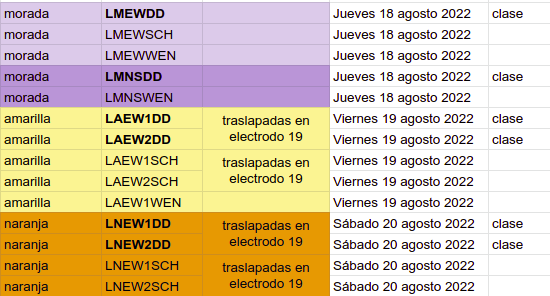

🟪 Dipolo - Dipolo  Lineas moradas

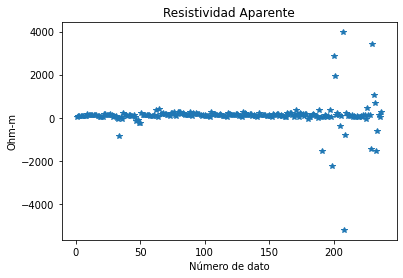

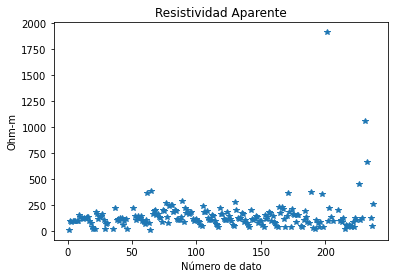

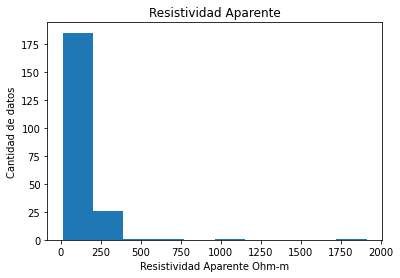

El número total de datos que entrarán a inversión son: 215


In [ ]:
LMEWDD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LMEWDD.stg'
stg_to_geoinversioncicese(LMEWDD,'no')

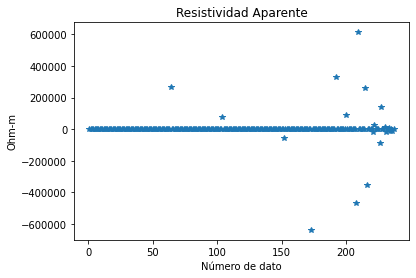

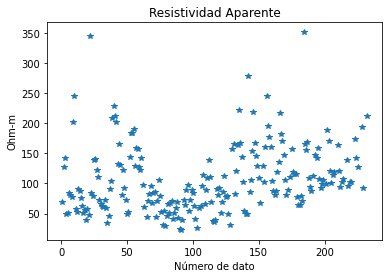

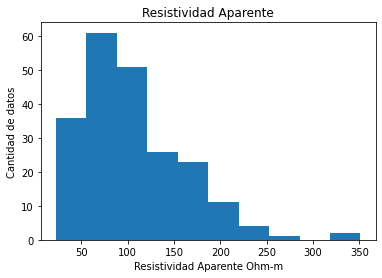

El número total de datos que entrarán a inversión son: 215


In [ ]:
LMNSDD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LMNSDD.stg'
stg_to_geoinversioncicese(LMNSDD,'no')

🟨 Dipolo - Dipolo  Lineas amarillas

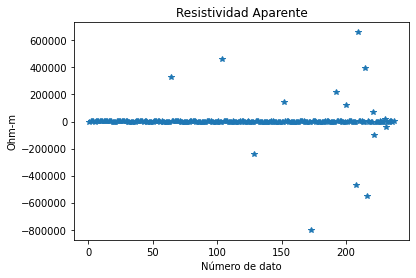

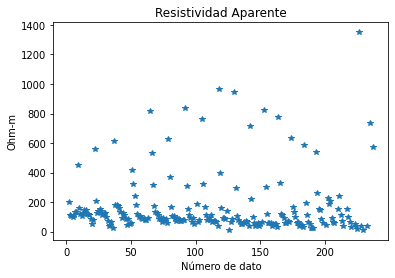

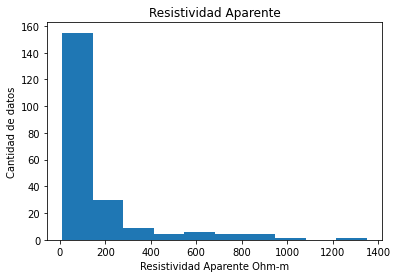

El número total de datos que entrarán a inversión son: 214


In [ ]:
LAEW1DD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LAEW1DD.stg'
stg_to_geoinversioncicese(LAEW1DD,'no')

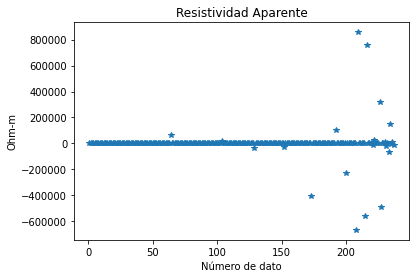

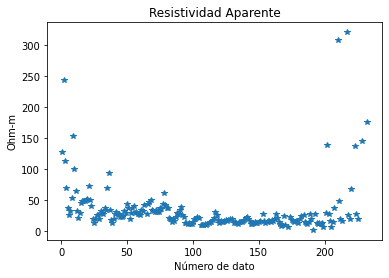

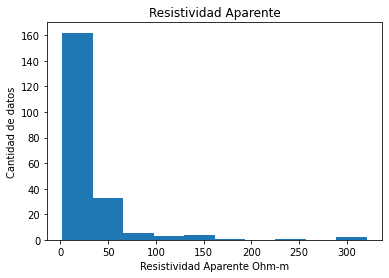

El número total de datos que entrarán a inversión son: 211


In [ ]:
LAEW2DD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LAEW2DD.stg'
stg_to_geoinversioncicese(LAEW2DD,'yes')

🟧 Dipolo - Dipolo  Lineas naranjas



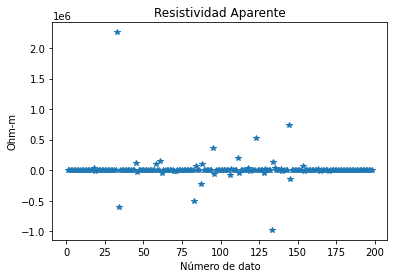

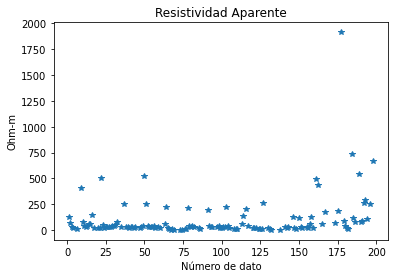

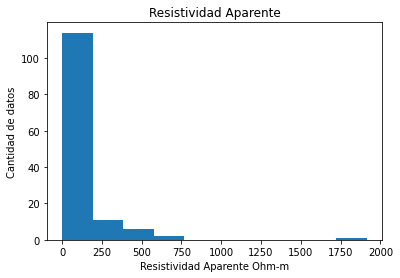

El número total de datos que entrarán a inversión son: 134


In [ ]:
LNEW1DD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LNEW1DD.stg'
stg_to_geoinversioncicese(LNEW1DD,'no')

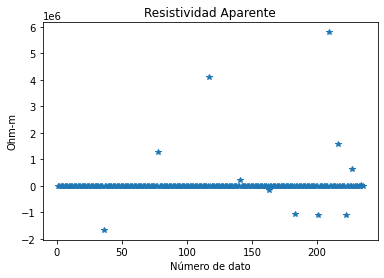

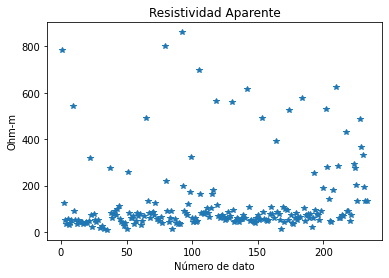

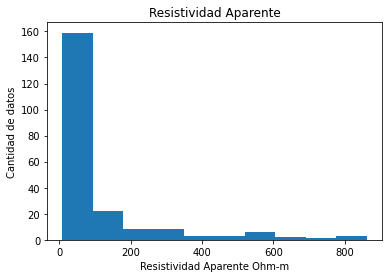

El número total de datos que entrarán a inversión son: 215


In [ ]:
LNEW2DD=r'/content/drive/MyDrive/Colab Notebooks/ERT_escuela_verano_2022_CICESE/LNEW2DD.stg'
stg_to_geoinversioncicese(LNEW2DD,'yes')